# Logistic Regression with non-linear features

## import library

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [172]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train          = np.genfromtxt(fname_data_train, delimiter=',')
data_test           = np.genfromtxt(fname_data_test, delimiter=',')

number_data_train   = data_train.shape[0]
number_data_test    = data_test.shape[0]

data_train_point    = data_train[:, 0:2]
data_train_point_x  = data_train_point[:, 0]
data_train_point_y  = data_train_point[:, 1]
data_train_label    = data_train[:, 2]

data_test_point     = data_test[:, 0:2]
data_test_point_x   = data_test_point[:, 0]
data_test_point_y   = data_test_point[:, 1]
data_test_label     = data_test[:, 2]

data_train_label_class_0    = (data_train_label == 0)
data_train_label_class_1    = (data_train_label == 1)

data_test_label_class_0     = (data_test_label == 0)
data_test_label_class_1     = (data_test_label == 1)

data_train_point_x_class_0  = data_train_point_x[data_train_label_class_0]
data_train_point_y_class_0  = data_train_point_y[data_train_label_class_0]

data_train_point_x_class_1  = data_train_point_x[data_train_label_class_1]
data_train_point_y_class_1  = data_train_point_y[data_train_label_class_1]

data_test_point_x_class_0   = data_test_point_x[data_test_label_class_0]
data_test_point_y_class_0   = data_test_point_y[data_test_label_class_0]

data_test_point_x_class_1   = data_test_point_x[data_test_label_class_1]
data_test_point_y_class_1   = data_test_point_y[data_test_label_class_1]

print('shape of point in train data = ', data_train_point.shape)
print('shape of point in test data = ', data_train_point.shape)

print('shape of label in train data = ', data_test_label.shape)
print('shape of label in test data = ', data_test_label.shape)

print('data type of point x in train data = ', data_train_point_x.dtype)
print('data type of point y in train data = ', data_train_point_y.dtype)

print('data type of point x in test data = ', data_test_point_x.dtype)
print('data type of point y in test data = ', data_test_point_y.dtype)


shape of point in train data =  (500, 2)
shape of point in test data =  (500, 2)
shape of label in train data =  (500,)
shape of label in test data =  (500,)
data type of point x in train data =  float64
data type of point y in train data =  float64
data type of point x in test data =  float64
data type of point y in test data =  float64


## plot the data

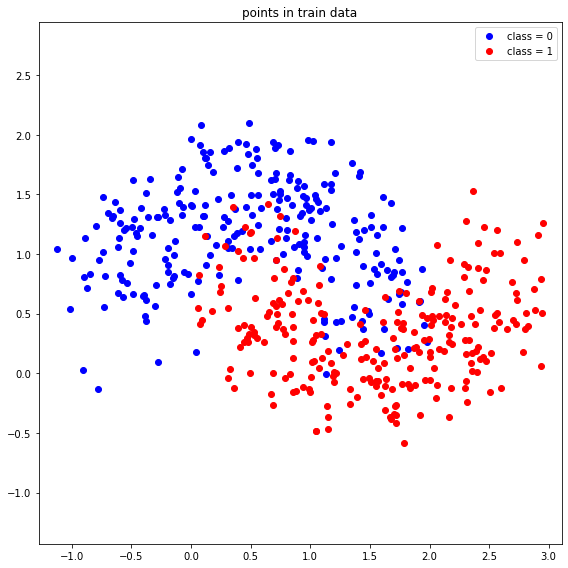

In [173]:
f = plt.figure(figsize=(8,8))   

plt.title('points in train data')
plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

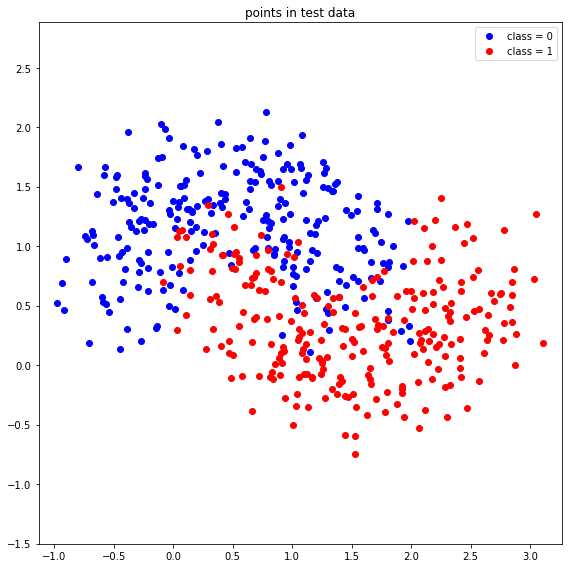

In [174]:
f = plt.figure(figsize=(8,8))   

plt.title('points in test data')
plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [175]:
def compute_feature(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(point[:,0])
    ones = np.ones(n)
    x = point[:,0]
    y = point[:,1]
    
    feature = np.stack([ones,y,x,x*y,x*x,x*x*x,x*x*y,y*y,y*y*y])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [176]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.dot(theta,feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [177]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1 / (1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [178]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    linear_regression = compute_linear_regression(theta,feature)

    value = sigmoid(linear_regression)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [179]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    logistic_regression = compute_logistic_regression(theta,feature)
    exp = np.finfo(float).eps
    residual = label * np.log(logistic_regression+exp) + (1-label)*np.log(1-logistic_regression+exp)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [180]:
def compute_loss(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(label)
    d = len(theta)
    logistic_regression = compute_logistic_regression(theta,feature)
    exp = np.finfo(float).eps
    residual = label * np.log(logistic_regression+exp) + (1-label)*np.log(1-logistic_regression+exp)
    regularization = (1/d)*np.sum(np.square(theta))
    loss = -(1/n) * np.sum(residual)
    loss += alpha * regularization
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [181]:
def compute_gradient(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(label)
    d = len(theta)
    logistic_regression = compute_logistic_regression(theta,feature)

    gradient = (1/n) * np.sum((logistic_regression-label)*feature,axis=1)
    gradient +=(alpha/d) * theta
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [182]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(label)
    logistic_regression = compute_logistic_regression(theta,feature)
    frequency = []

    for i in range(len(logistic_regression)):
        cur_logit = logistic_regression[i]
        if (cur_logit>=0.5):
            frequency.append(1)
        else:
            frequency.append(0)

    true_cnt =0 
    for index, logit in enumerate(frequency):
        if (logit == label[index]):
            true_cnt+=1
    
    accuracy = true_cnt / n
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [183]:
number_iteration    = 30000 # you can change this value as you want 
learning_rate       = 0.8 # you can change this value as you want 
number_feature      = 9 # you can change this value as you want
alpha               = 1e-8 # you can change this value as you want

theta                       = np.zeros(number_feature)
loss_iteration_train        = np.zeros(number_iteration)
loss_iteration_test         = np.zeros(number_iteration)
accuracy_iteration_train    = np.zeros(number_iteration)
accuracy_iteration_test     = np.zeros(number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [184]:
for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
 
    theta           = theta - learning_rate * compute_gradient(theta,compute_feature(data_train),data_train_label,alpha)
    loss_train      = compute_loss(theta,compute_feature(data_train),data_train_label,alpha)
    loss_test       = compute_loss(theta,compute_feature(data_test),data_test_label,alpha)
    accuracy_train  = compute_accuracy(theta,compute_feature(data_train),data_train_label)
    accuracy_test   = compute_accuracy(theta,compute_feature(data_test),data_test_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    loss_iteration_train[i]     = loss_train
    loss_iteration_test[i]      = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i]  = accuracy_test

theta_optimal = theta

___

___

## functions for presenting the results

___

___

In [185]:
def function_result_01():

    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))

In [186]:
def function_result_02():

    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))

In [187]:
def function_result_03():
    
    plt.figure(figsize=(8,6))
    plt.title('training loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [188]:
def function_result_04():

    plt.figure(figsize=(8,6))
    plt.title('testing loss')

    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [189]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('training accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [190]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('testing accuracy')

    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [191]:
def function_result_07():

    plt.figure(figsize=(13,13)) 
    plt.title('linear regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size
    # print("shape ",shape)
    # print("X.size :",X.size)
    # print("Y.size :",Y.size)
    # print("x_shape : ", x_shape)
    # print("y_shape :", y_shape)
    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature2 = compute_feature(inputs)
    linear_regression = compute_linear_regression(theta_optimal,computed_feature2)
    #print("ZZ shape :",ZZ.shape)
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    linear_regression = linear_regression.reshape((y_shape,x_shape))
    ######################################
    

    n = len(data_train)
    data_x = data_train[:,0]
    data_y = data_train[:,1]

    split_line = colors.TwoSlopeNorm(vmin=linear_regression.min(),vcenter=0,vmax = linear_regression.max()) 
    plt.contour(XX,YY,linear_regression,levels=[0],colors="black")
    cmap = plt.get_cmap('RdBu_r')
    plt.contourf(XX,YY,linear_regression,cmap=cmap, norm = split_line, levels = np.linspace(linear_regression.min(),linear_regression.max(),80))

    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*5

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    # plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    # plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [192]:
def function_result_08():
    
    plt.figure(figsize=(13,13)) 
    plt.title('linear regression values on the testing data')
    
    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1)
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size
    # print("shape ",shape)
    # print("X.size :",X.size)
    # print("Y.size :",Y.size)
    # print("x_shape : ", x_shape)
    # print("y_shape :", y_shape)
    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature2 = compute_feature(inputs)
    linear_regression = compute_linear_regression(theta_optimal,computed_feature2)
    #print("ZZ shape :",ZZ.shape)
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    linear_regression = linear_regression.reshape((y_shape,x_shape))
    ######################################
    

    n = len(data_train)
    data_x = data_test[:,0]
    data_y = data_test[:,1]

    split_line = colors.TwoSlopeNorm(vmin=linear_regression.min(),vcenter=0,vmax = linear_regression.max()) 
    plt.contour(XX,YY,linear_regression,levels=[0],colors="black")
    cmap = plt.get_cmap('RdBu_r')
    plt.contourf(XX,YY,linear_regression,cmap=cmap, norm = split_line, levels = np.linspace(linear_regression.min(),linear_regression.max(),80))

    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*5

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    # plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    # plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])





    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [193]:
def function_result_09():

    plt.figure(figsize=(13,13)) 
    plt.title('logistic regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size
    n = len(data_train)
    # print("shape ",shape)
    # print("X.size :",X.size)
    # print("Y.size :",Y.size)
    # print("x_shape : ", x_shape)
    # print("y_shape :", y_shape)
    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature1 = compute_feature(inputs)
    logistic_regression = compute_logistic_regression(theta_optimal,computed_feature1)
    #print("ZZ shape :",ZZ.shape)
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    logistic_regression = logistic_regression.reshape((y_shape,x_shape))
    ######################################
    

    
    data_x = data_train[:,0]
    data_y = data_train[:,1]



    split_line = colors.TwoSlopeNorm(vmin=0,vcenter=logistic_regression.min(),vmax = logistic_regression.max()) 
    plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")
    cmap = plt.get_cmap('RdBu_r')
    #plt.contourf(XX,YY,ZZ,cmap=cmap, norm = split_line, levels = np.linspace(0,ZZ.max(),80))
    plt.contourf(XX,YY,logistic_regression,cmap=cmap,norm=split_line)
    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*5

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    # plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    # plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])   


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [194]:
def function_result_10():
    
    plt.figure(figsize=(13,13)) 
    plt.title('logistic regression values on the testing data')

    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size
    n = len(data_test)
    # print("shape ",shape)
    # print("X.size :",X.size)
    # print("Y.size :",Y.size)
    # print("x_shape : ", x_shape)
    # print("y_shape :", y_shape)
    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature1 = compute_feature(inputs)
    logistic_regression = compute_logistic_regression(theta_optimal,computed_feature1)
    #print("ZZ shape :",ZZ.shape)
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    logistic_regression = logistic_regression.reshape((y_shape,x_shape))
    ######################################
    

    
    data_x = data_test[:,0]
    data_y = data_test[:,1]



    split_line = colors.TwoSlopeNorm(vmin=0,vcenter=logistic_regression.min(),vmax = logistic_regression.max()) 
    plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")
    cmap = plt.get_cmap('RdBu_r')
    #plt.contourf(XX,YY,ZZ,cmap=cmap, norm = split_line, levels = np.linspace(0,ZZ.max(),80))
    plt.contourf(XX,YY,logistic_regression,cmap=cmap,norm=split_line)
    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*5

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    # plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    # plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])   




    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final training accuracy =  0.9160000000
**************************************************
## [RESULT 02]
**************************************************
final testing accuracy =  0.9060000000
**************************************************
## [RESULT 03]
**************************************************


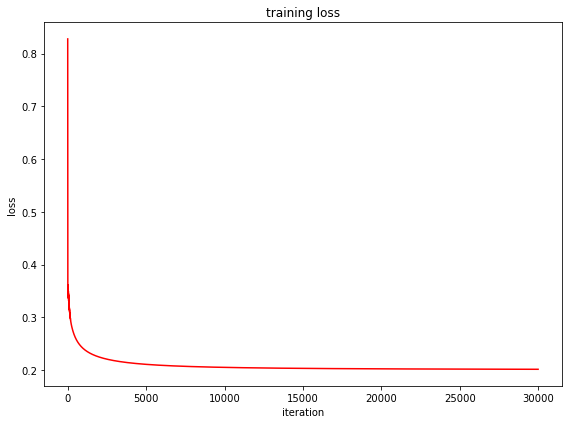

**************************************************
## [RESULT 04]
**************************************************


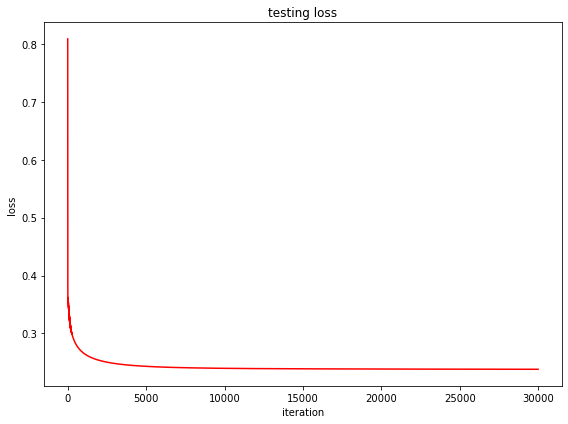

**************************************************
## [RESULT 05]
**************************************************


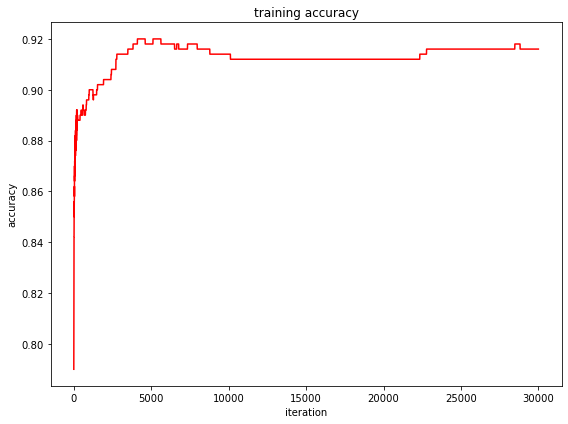

**************************************************
## [RESULT 06]
**************************************************


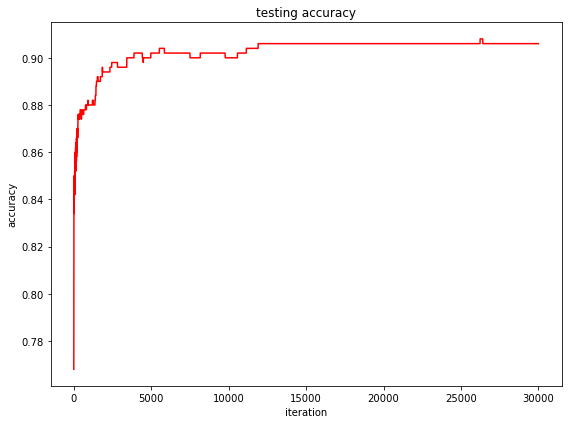

**************************************************
## [RESULT 07]
**************************************************


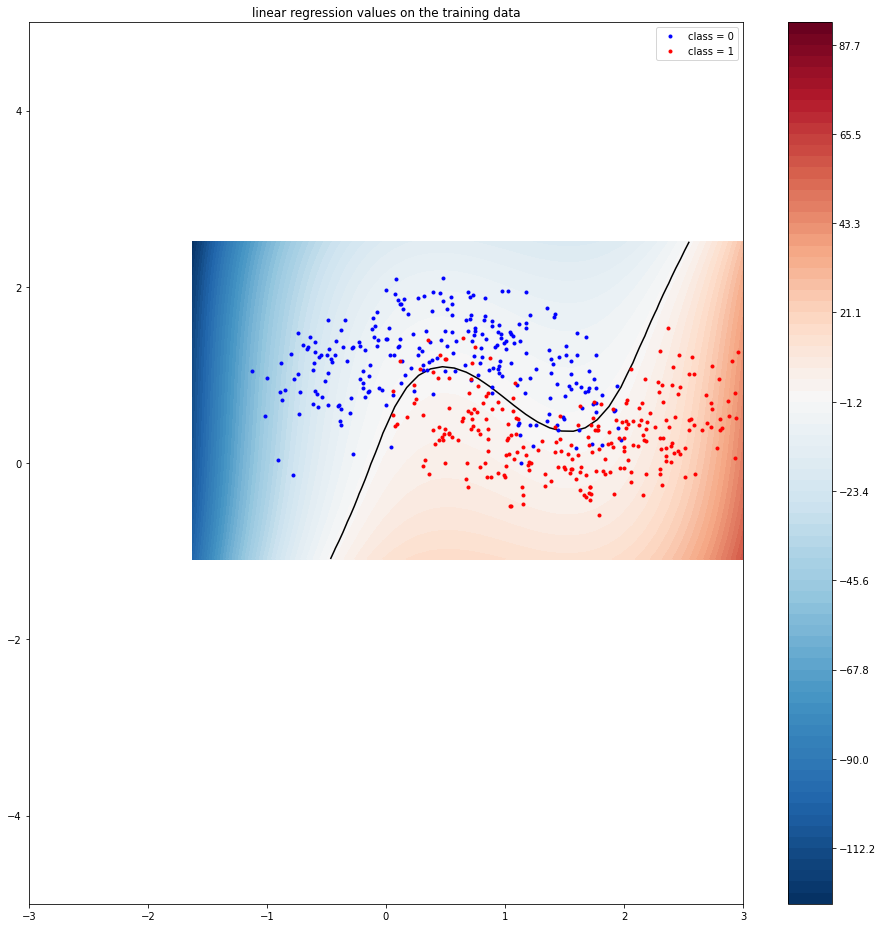

**************************************************
## [RESULT 08]
**************************************************


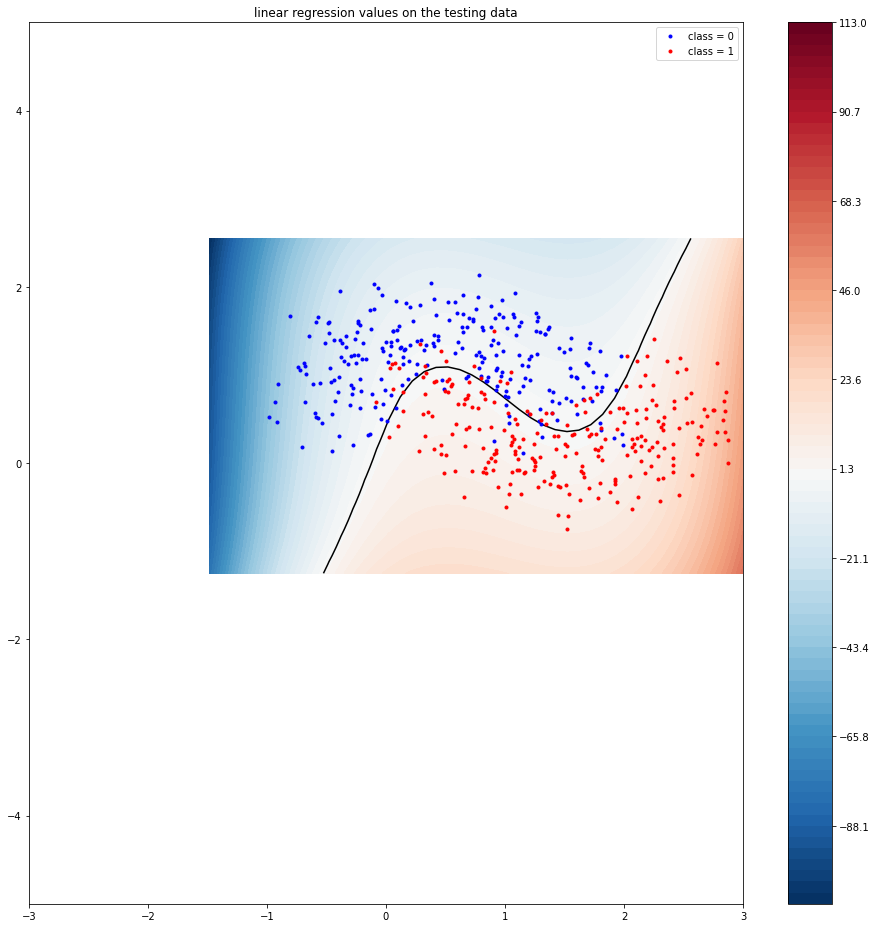

**************************************************
## [RESULT 09]
**************************************************


C:\Users\key23\AppData\Local\Temp/ipykernel_22880/1944000880.py:47: UserWarning: No contour levels were found within the data range.
  plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")


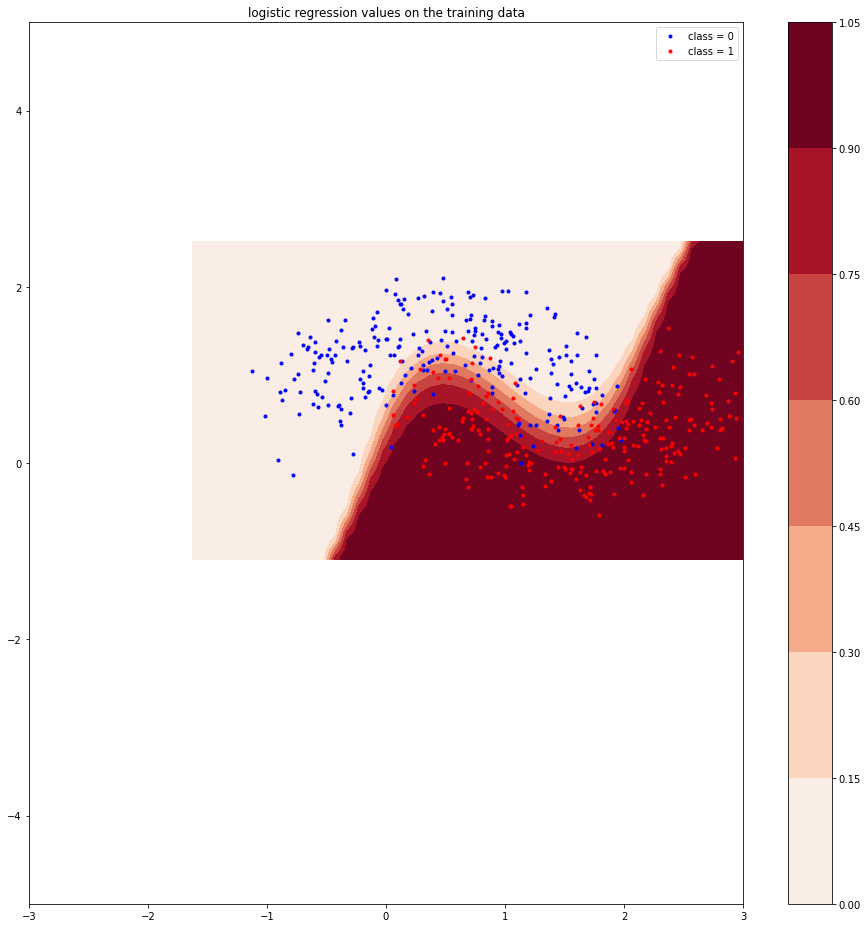

**************************************************
## [RESULT 10]
**************************************************


C:\Users\key23\AppData\Local\Temp/ipykernel_22880/548084560.py:47: UserWarning: No contour levels were found within the data range.
  plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")


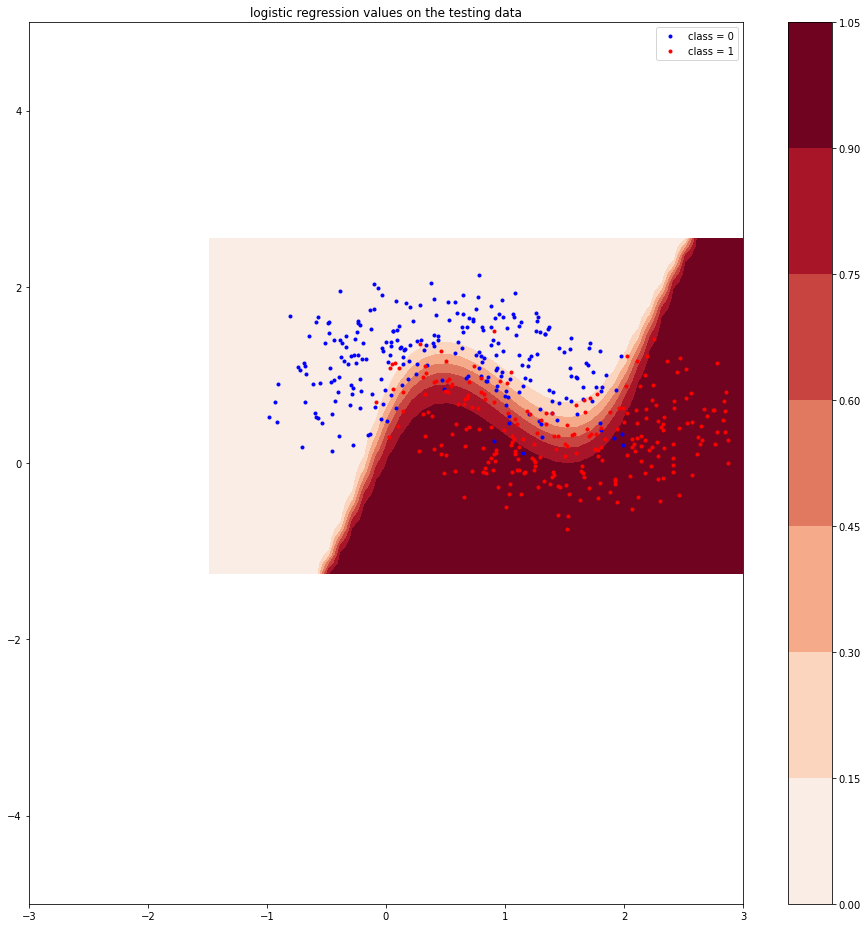

In [195]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)